In [1]:
import pandas as pd
import os 
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.svm import OneClassSVM
from sklearn.neighbors import LocalOutlierFactor
from sklearn.ensemble import IsolationForest
import plotly.express as px
import copy
import matplotlib.pyplot as plt

In [2]:
"""
Anomaly Detection with Supervised Learning (xgb) and calibration
Double median absolute deviation anomaly detection with calibration
Mahalanobis distance ranked anomaly detection with pca and calibration
Isolation forest anomaly detection with calibration
Local outlier factor anomaly detection with calibration
Synthetic AUC, Synthetic Logloss

"""

'\nAnomaly Detection with Supervised Learning (xgb) and calibration\nDouble median absolute deviation anomaly detection with calibration\nMahalanobis distance ranked anomaly detection with pca and calibration\nIsolation forest anomaly detection with calibration\nLocal outlier factor anomaly detection with calibration\nSynthetic AUC, Synthetic Logloss\n\n'

In [3]:
def read_dataset(file):
    if file.split('.')[1]=='csv':
        df = pd.read_csv(file)
    elif file.split('.')[1]=='xlsx':
        df = pd.read_excel(file)
    return df

In [4]:
def drop_distinct(df):
    for col in df.columns:
        if len(df[col].unique()) == 1:
            df = df.drop([col], 1)
    return df

In [5]:
def feature_engineering(df,timestamp_column):
    df[timestamp_column] = pd.to_datetime(df[timestamp_column])
    df['year'] = df[timestamp_column].dt.year.astype(str)
    df['month'] = df[timestamp_column].dt.month.astype(str)
    df['day'] = df[timestamp_column].dt.day.astype(str)
    df['weekday'] = df[timestamp_column].dt.weekday.astype(str)
    df['hour'] = df[timestamp_column].dt.hour.astype(str)
    df['week'] = df[timestamp_column].dt.isocalendar().week.astype(str)
    df['minute'] = df[timestamp_column].dt.minute.astype(str)
    df = df.set_index(pd.DatetimeIndex(df[timestamp_column])).drop(timestamp_column, axis=1)
    return df

In [6]:
def pipeline_build(model,cat_cols):
    categorical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='constant')),
        ('onehot', OneHotEncoder(handle_unknown='ignore'))])
    preprocessor = ColumnTransformer(
        transformers=[
            ('cat', categorical_transformer, cat_cols)], remainder='passthrough')
    pipe = Pipeline(steps=[('preprocessor', preprocessor),
                           ('algorithm', model)])
    return pipe

In [7]:
def plot_matplotlib(df,title,model):
    colors = {'anomaly': 'red', 'not anomaly': 'blue'}
    plt.scatter(df['timestamp'], df['value'], c=df['output'].map(colors))
    plt.title(f'{title} with {type(model).__name__}')
    plt.xlabel('Timestamp')
    plt.ylabel('Value')
    plt.show()

In [8]:
def plot_pxexpress(df,title,model):
    fig = px.scatter(df, x='timestamp', y='value', color='output',
                             title=f'{title} with {type(model).__name__}',
                             color_discrete_map={"anomaly": "red", "not anomaly": "blue"})
    fig.update_layout(width=800, height=600)
    fig.show()

In [9]:
data_source = "C:/Users/MahmutYAVUZ/Desktop/Software/Python/kaggle/anomaly_detection/data/raw/"

C:\Users\MahmutYAVUZ\AppData\Local\Temp\ipykernel_11068\2992438103.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = df.drop([col], 1)
C:\Users\MahmutYAVUZ\AppData\Local\Temp\ipykernel_11068\2992438103.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = df.drop([col], 1)


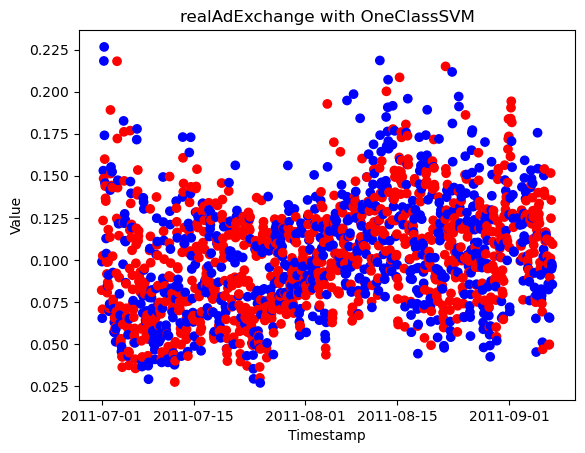

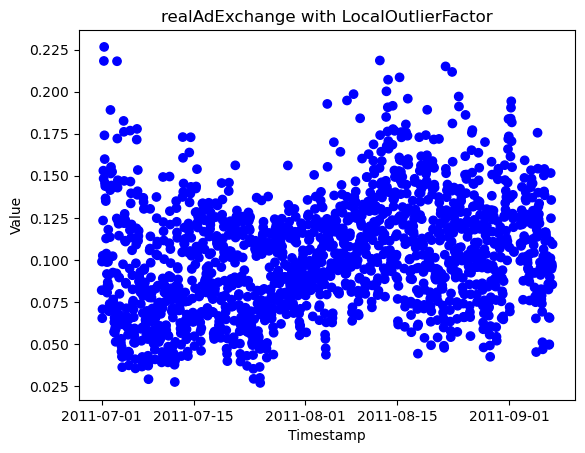

C:\Users\MahmutYAVUZ\AppData\Local\Temp\ipykernel_11068\2992438103.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = df.drop([col], 1)
C:\Users\MahmutYAVUZ\AppData\Local\Temp\ipykernel_11068\2992438103.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = df.drop([col], 1)


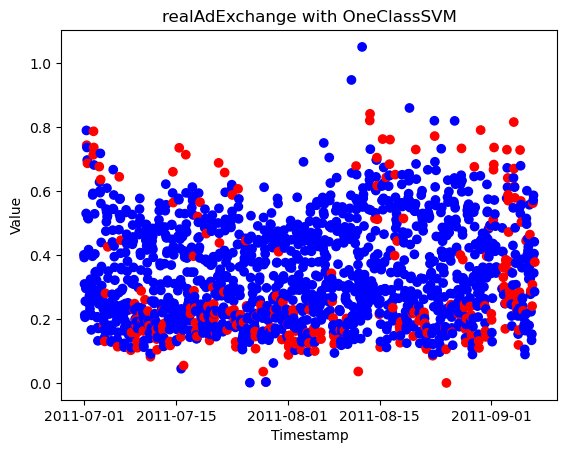

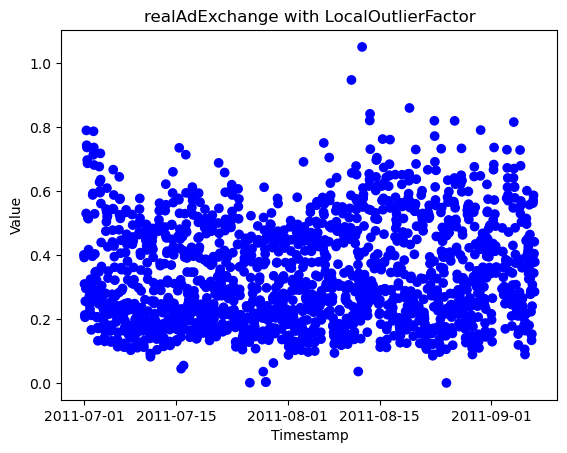

C:\Users\MahmutYAVUZ\AppData\Local\Temp\ipykernel_11068\2992438103.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = df.drop([col], 1)
C:\Users\MahmutYAVUZ\AppData\Local\Temp\ipykernel_11068\2992438103.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = df.drop([col], 1)


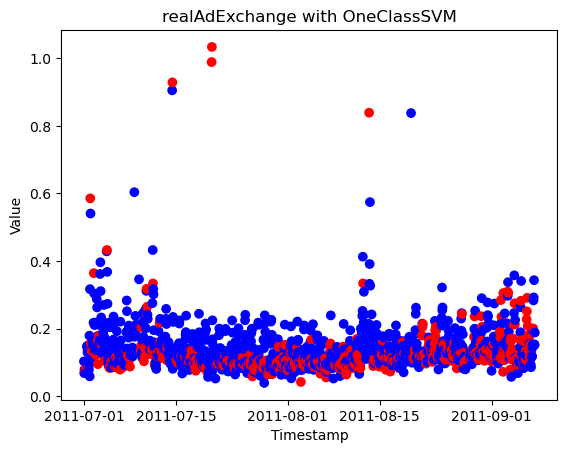

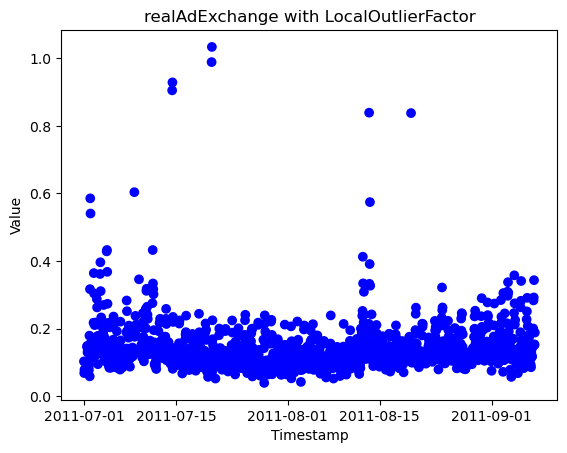

C:\Users\MahmutYAVUZ\AppData\Local\Temp\ipykernel_11068\2992438103.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = df.drop([col], 1)
C:\Users\MahmutYAVUZ\AppData\Local\Temp\ipykernel_11068\2992438103.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = df.drop([col], 1)


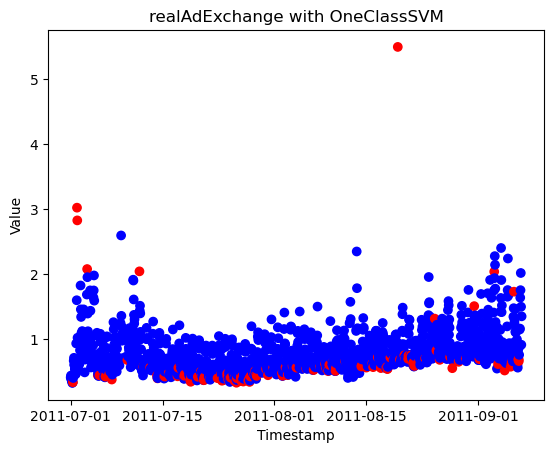

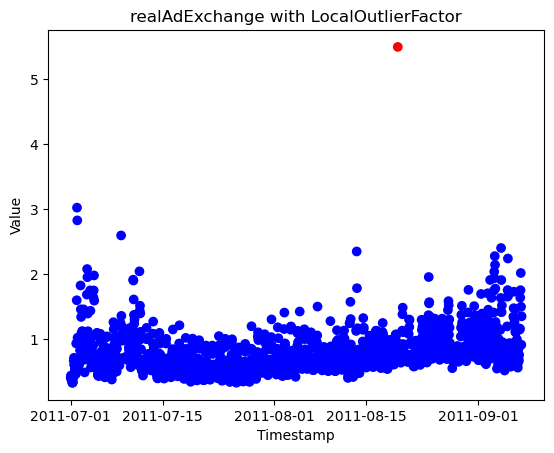

C:\Users\MahmutYAVUZ\AppData\Local\Temp\ipykernel_11068\2992438103.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = df.drop([col], 1)
C:\Users\MahmutYAVUZ\AppData\Local\Temp\ipykernel_11068\2992438103.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = df.drop([col], 1)


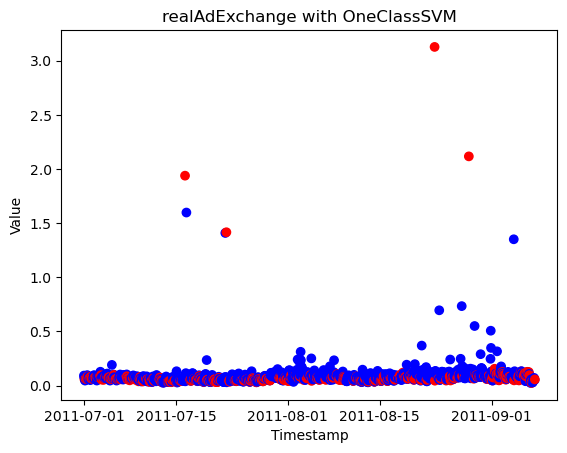

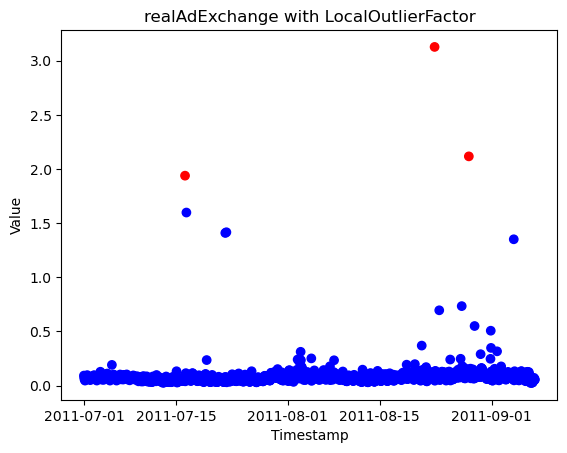

C:\Users\MahmutYAVUZ\AppData\Local\Temp\ipykernel_11068\2992438103.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = df.drop([col], 1)
C:\Users\MahmutYAVUZ\AppData\Local\Temp\ipykernel_11068\2992438103.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = df.drop([col], 1)


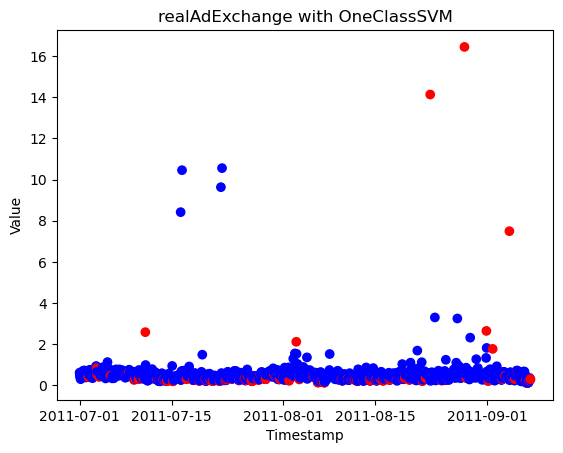

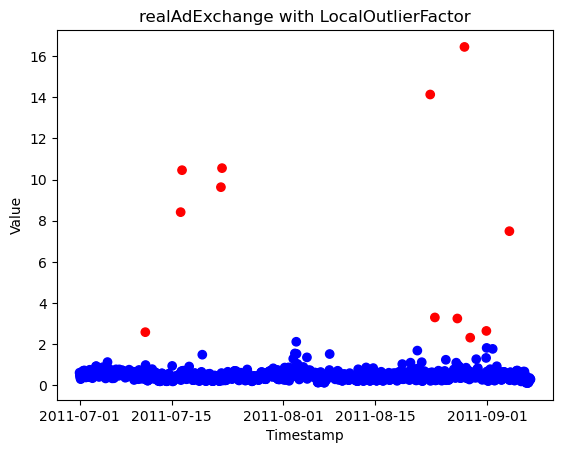

C:\Users\MahmutYAVUZ\AppData\Local\Temp\ipykernel_11068\2992438103.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = df.drop([col], 1)
C:\Users\MahmutYAVUZ\AppData\Local\Temp\ipykernel_11068\2992438103.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = df.drop([col], 1)


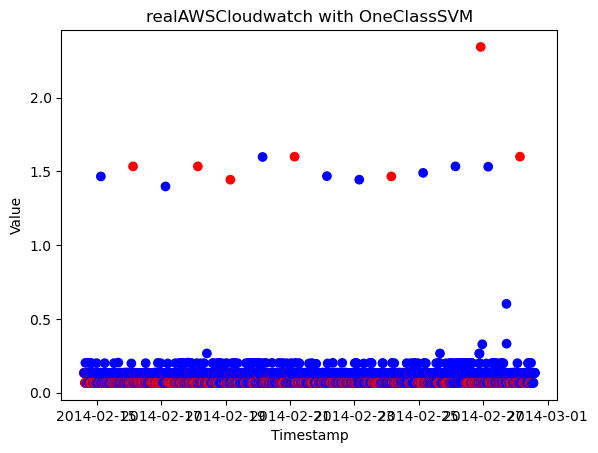

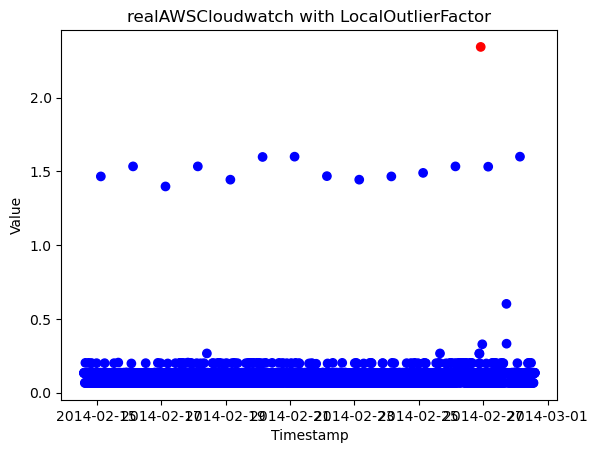

C:\Users\MahmutYAVUZ\AppData\Local\Temp\ipykernel_11068\2992438103.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = df.drop([col], 1)
C:\Users\MahmutYAVUZ\AppData\Local\Temp\ipykernel_11068\2992438103.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = df.drop([col], 1)


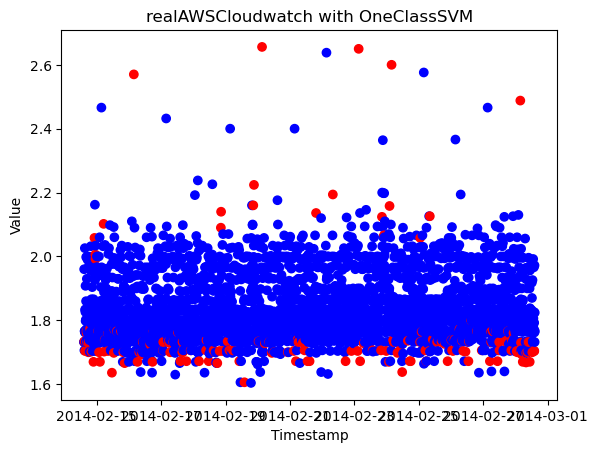

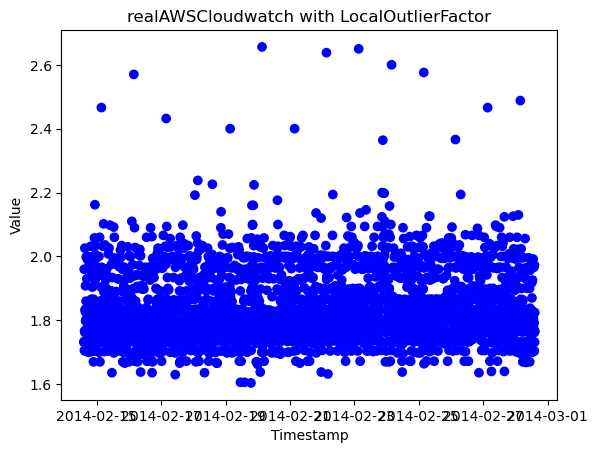

C:\Users\MahmutYAVUZ\AppData\Local\Temp\ipykernel_11068\2992438103.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = df.drop([col], 1)
C:\Users\MahmutYAVUZ\AppData\Local\Temp\ipykernel_11068\2992438103.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = df.drop([col], 1)


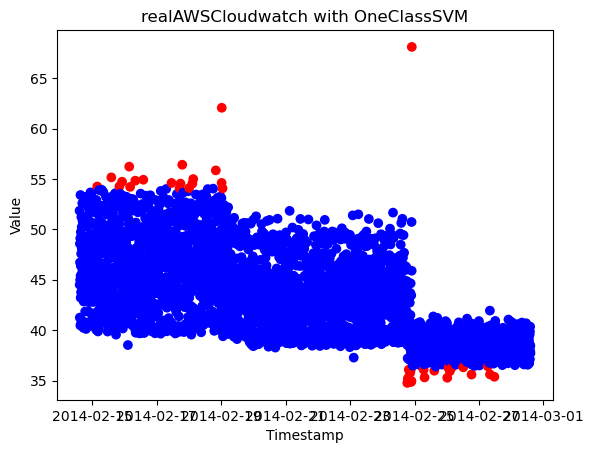

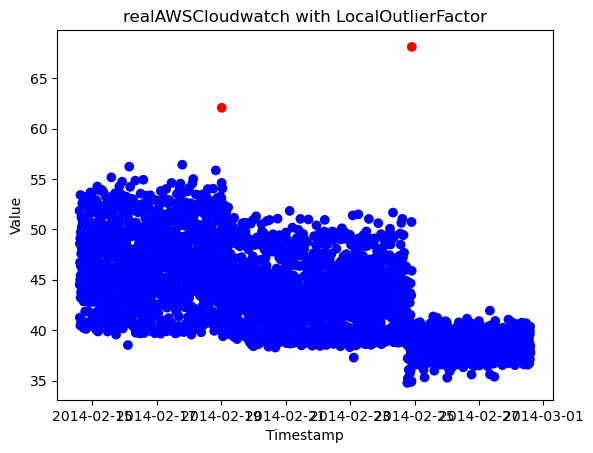

C:\Users\MahmutYAVUZ\AppData\Local\Temp\ipykernel_11068\2992438103.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = df.drop([col], 1)
C:\Users\MahmutYAVUZ\AppData\Local\Temp\ipykernel_11068\2992438103.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = df.drop([col], 1)


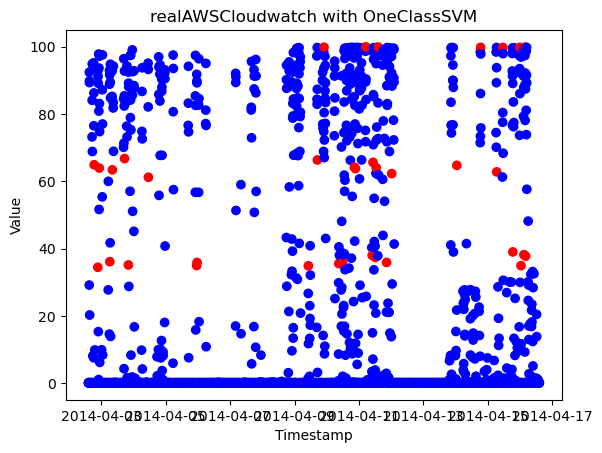

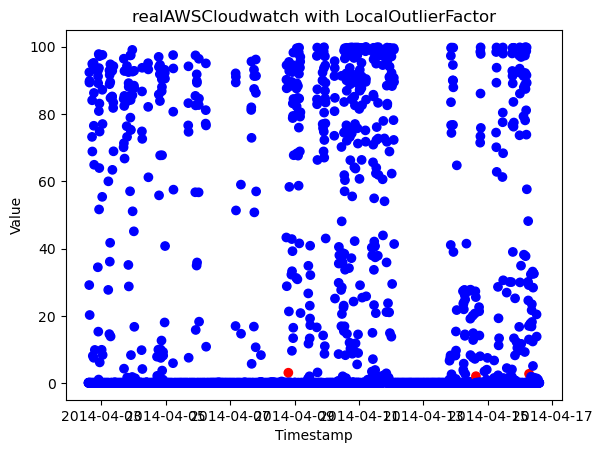

C:\Users\MahmutYAVUZ\AppData\Local\Temp\ipykernel_11068\2992438103.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = df.drop([col], 1)
C:\Users\MahmutYAVUZ\AppData\Local\Temp\ipykernel_11068\2992438103.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = df.drop([col], 1)


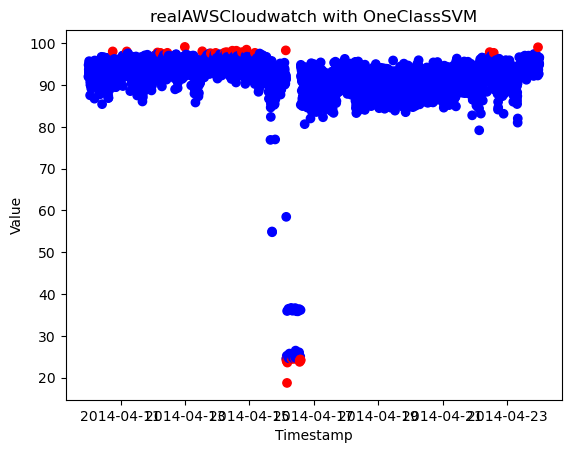

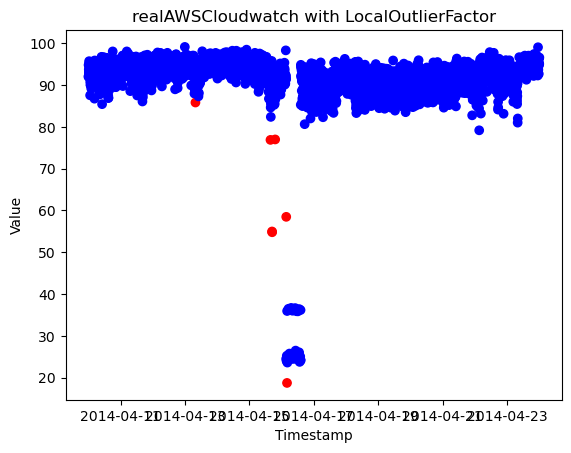

C:\Users\MahmutYAVUZ\AppData\Local\Temp\ipykernel_11068\2992438103.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = df.drop([col], 1)
C:\Users\MahmutYAVUZ\AppData\Local\Temp\ipykernel_11068\2992438103.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = df.drop([col], 1)


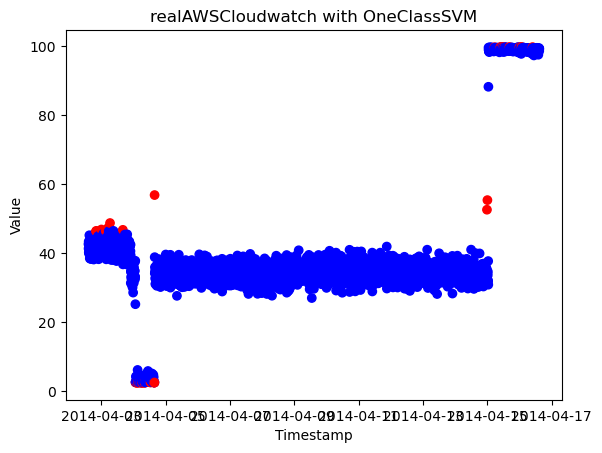

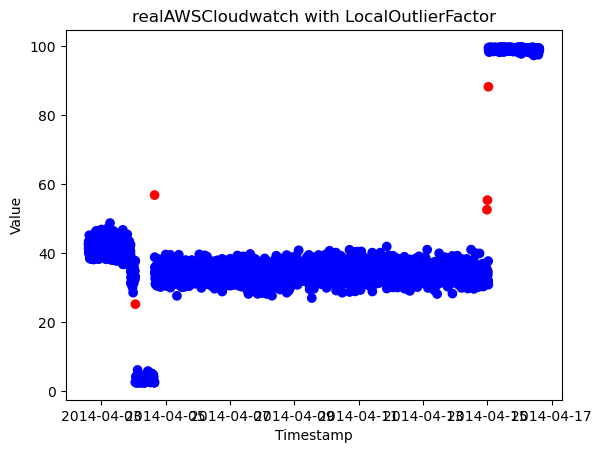

C:\Users\MahmutYAVUZ\AppData\Local\Temp\ipykernel_11068\2992438103.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = df.drop([col], 1)
C:\Users\MahmutYAVUZ\AppData\Local\Temp\ipykernel_11068\2992438103.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = df.drop([col], 1)


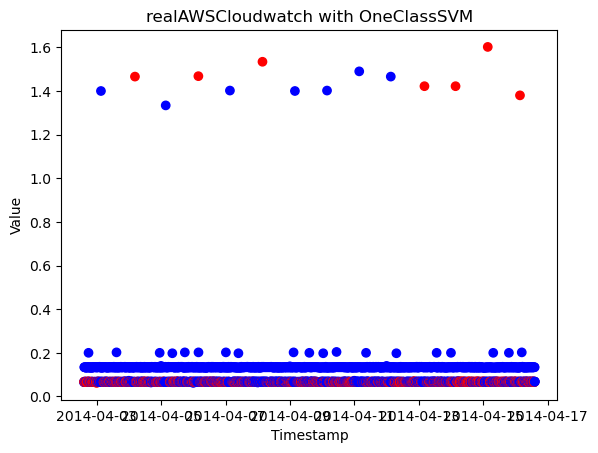

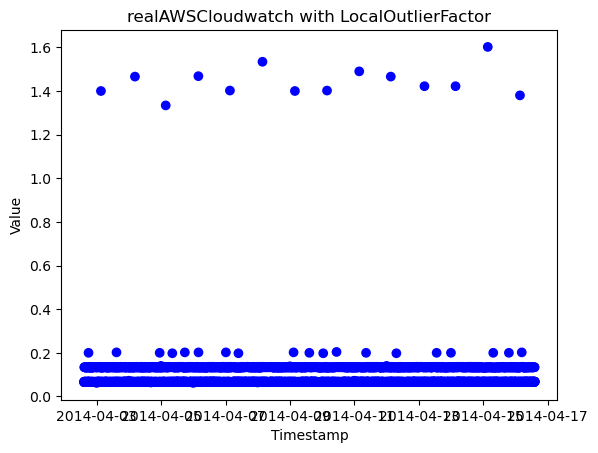

C:\Users\MahmutYAVUZ\AppData\Local\Temp\ipykernel_11068\2992438103.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = df.drop([col], 1)
C:\Users\MahmutYAVUZ\AppData\Local\Temp\ipykernel_11068\2992438103.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = df.drop([col], 1)


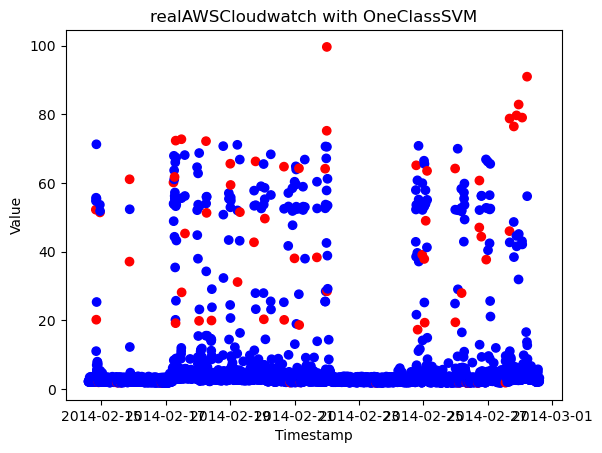

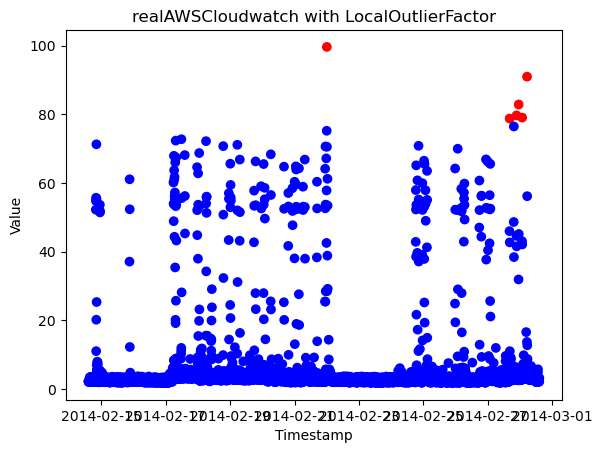

C:\Users\MahmutYAVUZ\AppData\Local\Temp\ipykernel_11068\2992438103.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = df.drop([col], 1)
C:\Users\MahmutYAVUZ\AppData\Local\Temp\ipykernel_11068\2992438103.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = df.drop([col], 1)


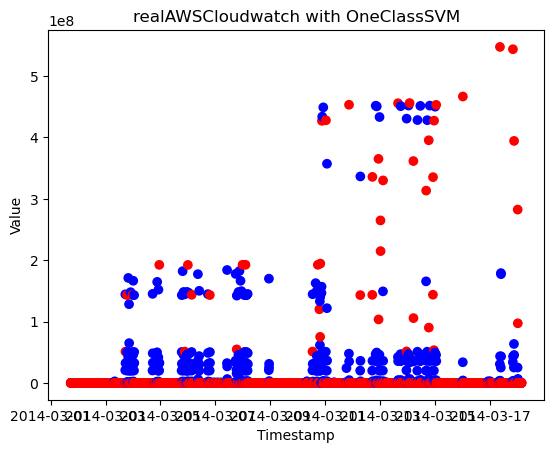

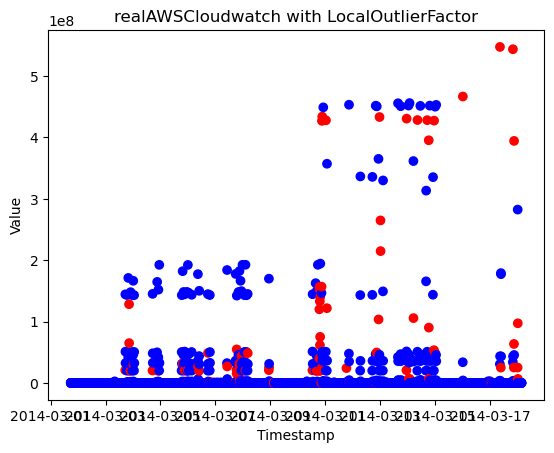

C:\Users\MahmutYAVUZ\AppData\Local\Temp\ipykernel_11068\2992438103.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = df.drop([col], 1)
C:\Users\MahmutYAVUZ\AppData\Local\Temp\ipykernel_11068\2992438103.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = df.drop([col], 1)


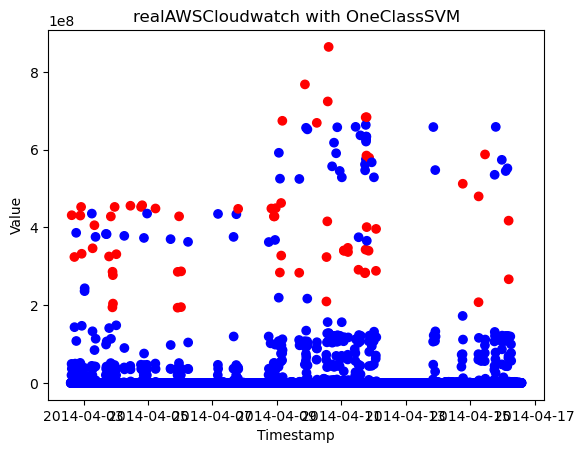

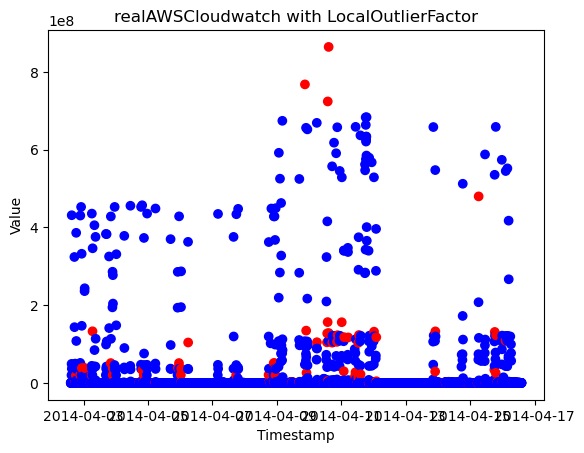

C:\Users\MahmutYAVUZ\AppData\Local\Temp\ipykernel_11068\2992438103.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = df.drop([col], 1)
C:\Users\MahmutYAVUZ\AppData\Local\Temp\ipykernel_11068\2992438103.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = df.drop([col], 1)


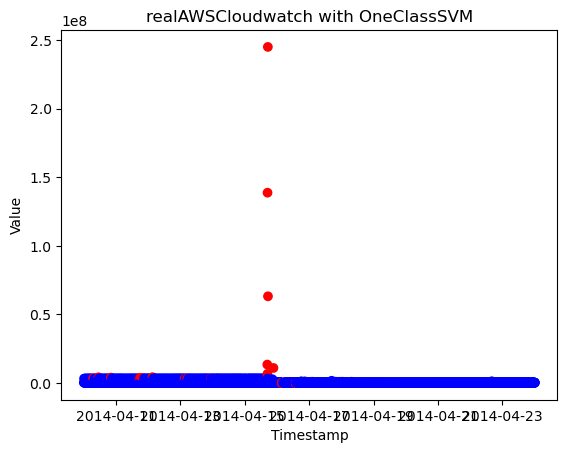

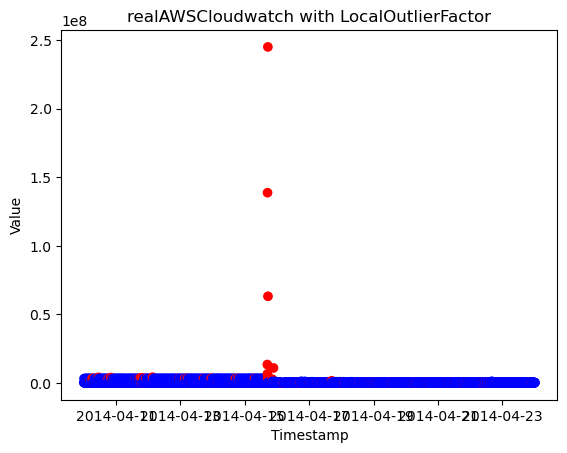

C:\Users\MahmutYAVUZ\AppData\Local\Temp\ipykernel_11068\2992438103.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = df.drop([col], 1)
C:\Users\MahmutYAVUZ\AppData\Local\Temp\ipykernel_11068\2992438103.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = df.drop([col], 1)


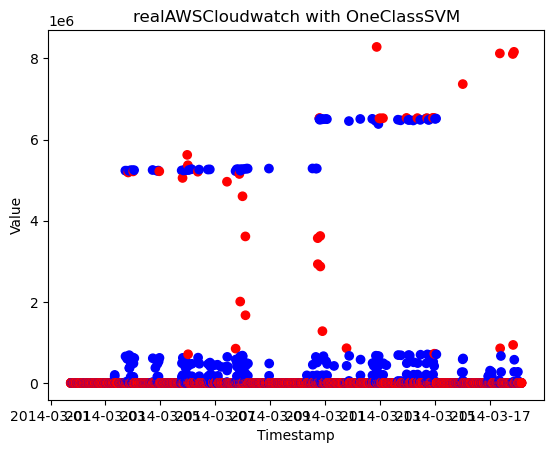

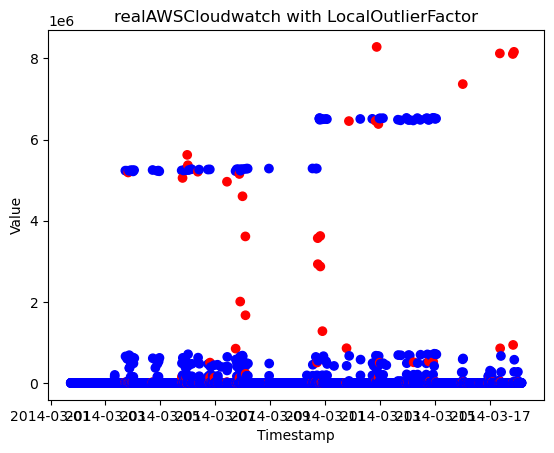

C:\Users\MahmutYAVUZ\AppData\Local\Temp\ipykernel_11068\2992438103.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = df.drop([col], 1)


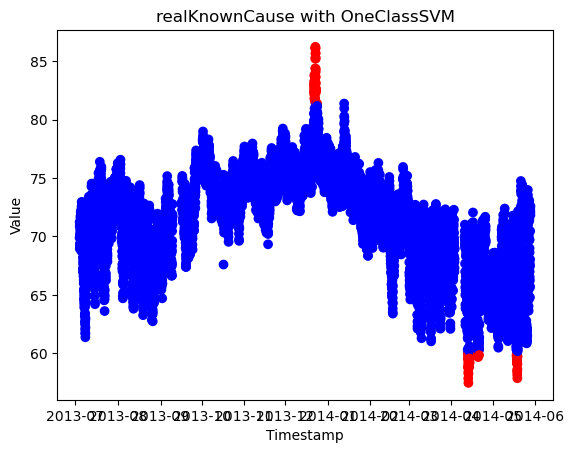

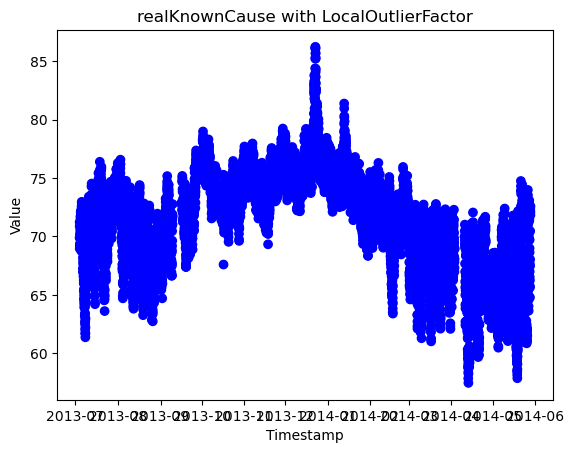

C:\Users\MahmutYAVUZ\AppData\Local\Temp\ipykernel_11068\2992438103.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = df.drop([col], 1)


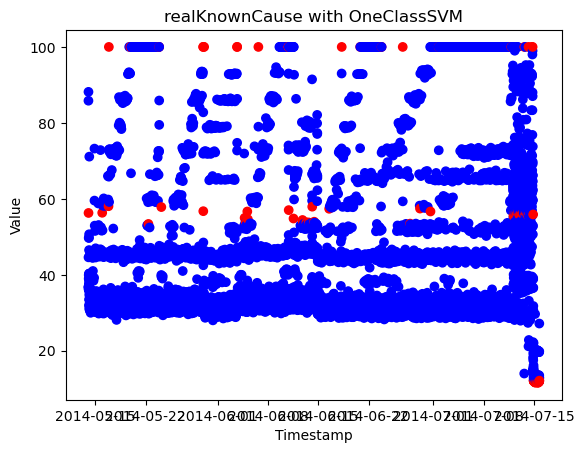

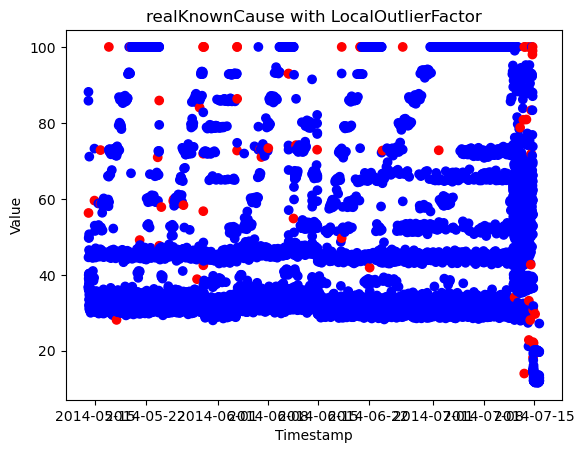

C:\Users\MahmutYAVUZ\AppData\Local\Temp\ipykernel_11068\2992438103.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = df.drop([col], 1)
C:\Users\MahmutYAVUZ\AppData\Local\Temp\ipykernel_11068\2992438103.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = df.drop([col], 1)


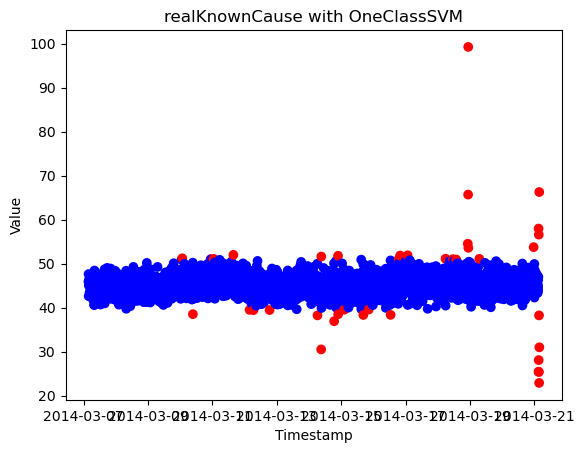

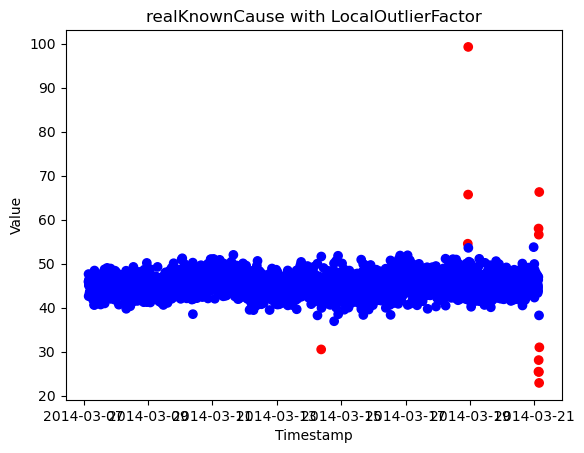

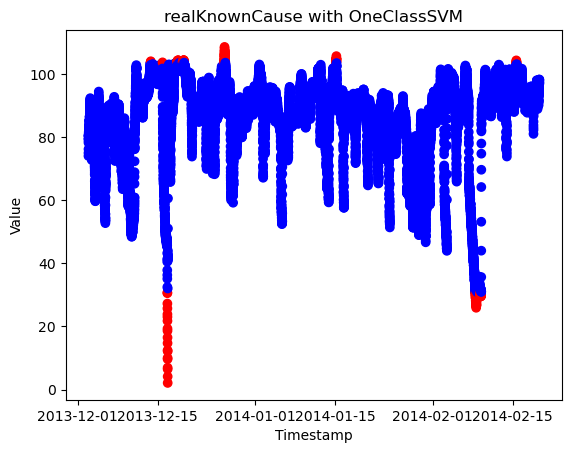

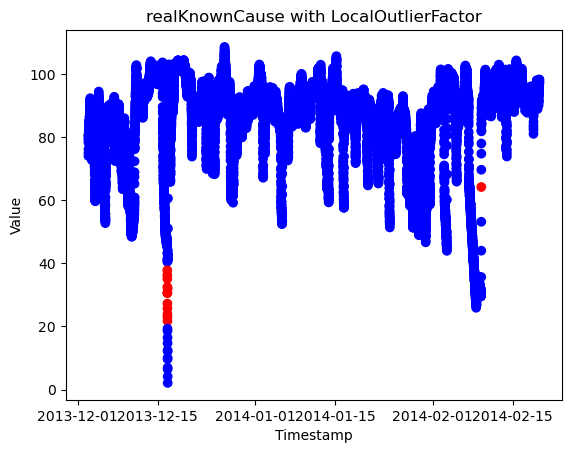

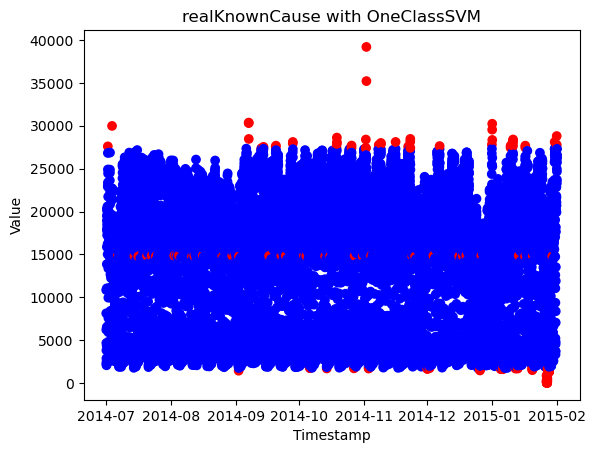

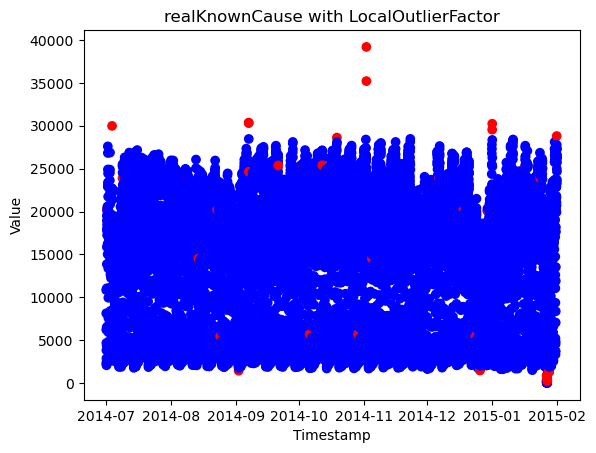

C:\Users\MahmutYAVUZ\AppData\Local\Temp\ipykernel_11068\2992438103.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = df.drop([col], 1)
C:\Users\MahmutYAVUZ\AppData\Local\Temp\ipykernel_11068\2992438103.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = df.drop([col], 1)


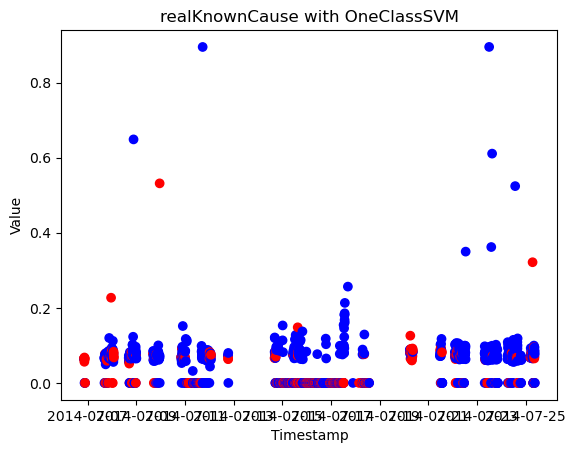

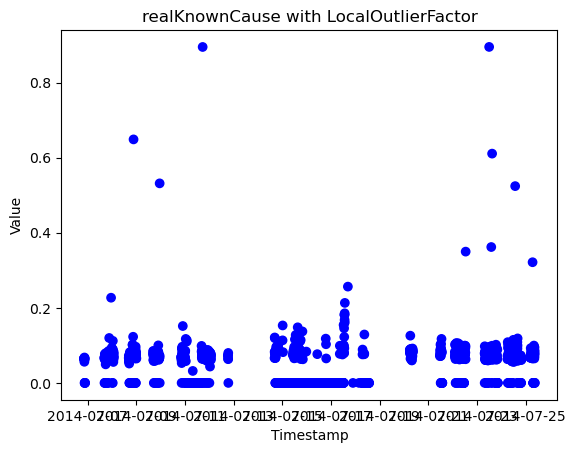

C:\Users\MahmutYAVUZ\AppData\Local\Temp\ipykernel_11068\2992438103.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = df.drop([col], 1)
C:\Users\MahmutYAVUZ\AppData\Local\Temp\ipykernel_11068\2992438103.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = df.drop([col], 1)


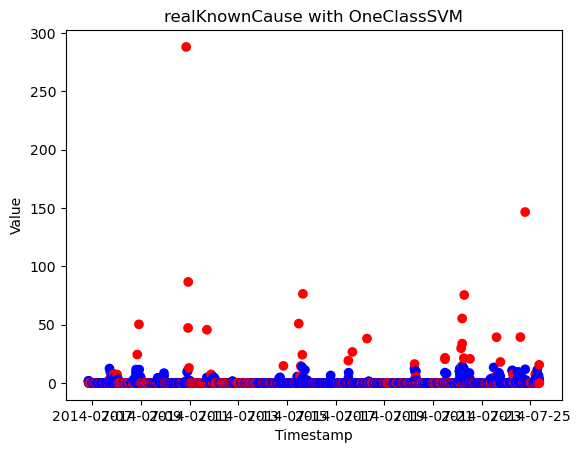

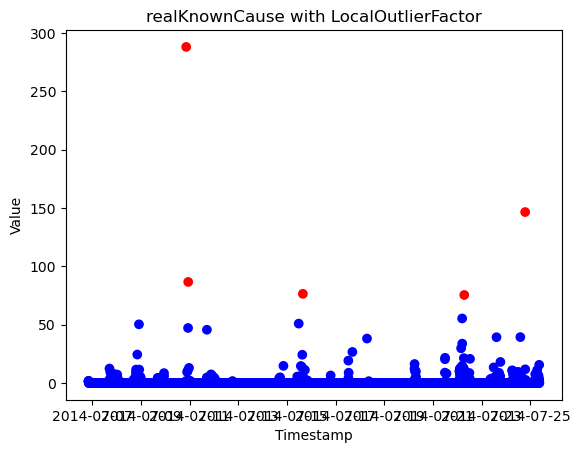

C:\Users\MahmutYAVUZ\AppData\Local\Temp\ipykernel_11068\2992438103.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = df.drop([col], 1)
C:\Users\MahmutYAVUZ\AppData\Local\Temp\ipykernel_11068\2992438103.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = df.drop([col], 1)


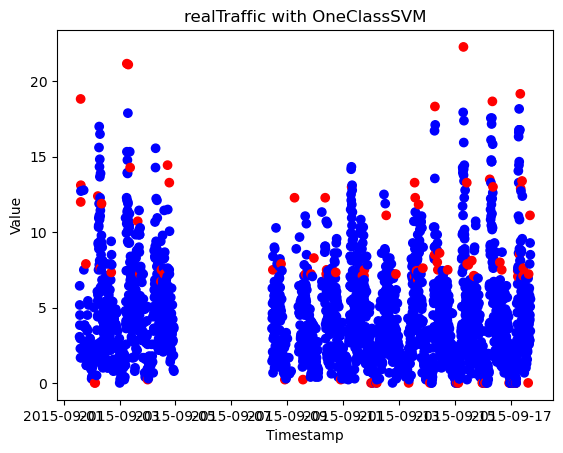

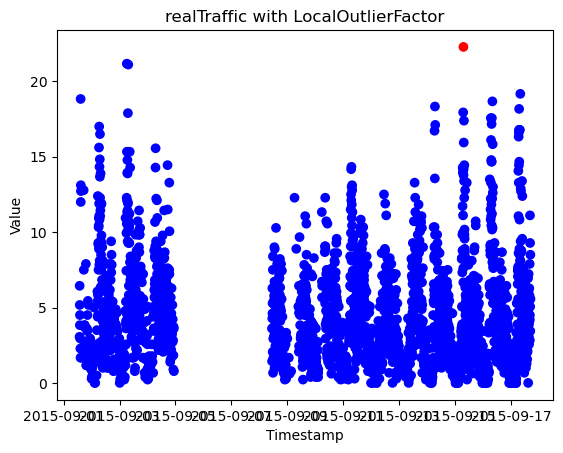

C:\Users\MahmutYAVUZ\AppData\Local\Temp\ipykernel_11068\2992438103.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = df.drop([col], 1)
C:\Users\MahmutYAVUZ\AppData\Local\Temp\ipykernel_11068\2992438103.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = df.drop([col], 1)


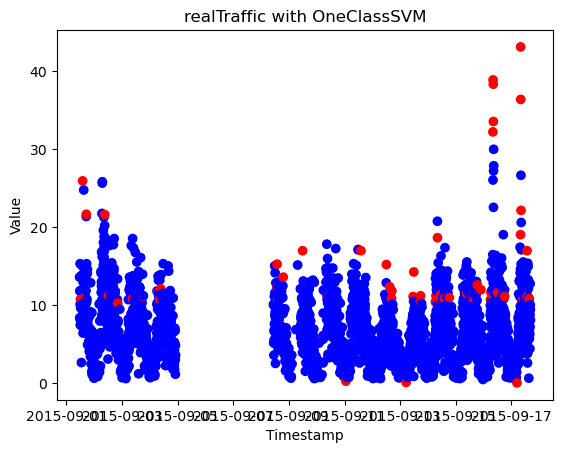

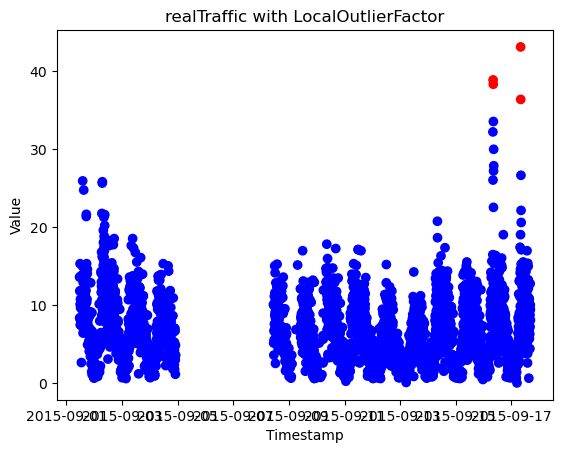

C:\Users\MahmutYAVUZ\AppData\Local\Temp\ipykernel_11068\2992438103.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = df.drop([col], 1)


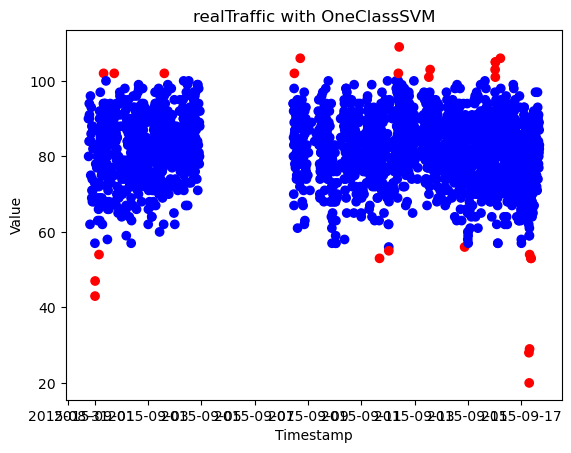

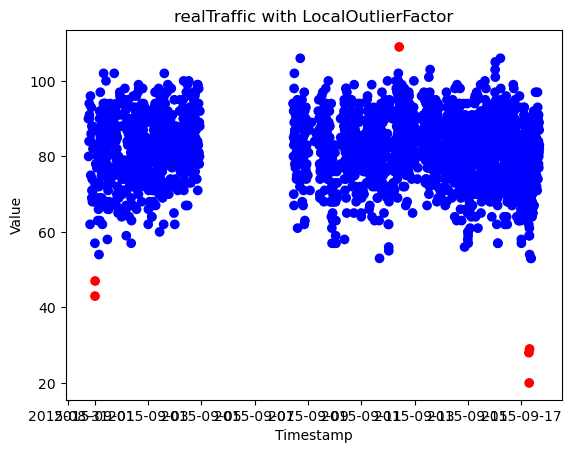

C:\Users\MahmutYAVUZ\AppData\Local\Temp\ipykernel_11068\2992438103.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = df.drop([col], 1)
C:\Users\MahmutYAVUZ\AppData\Local\Temp\ipykernel_11068\2992438103.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = df.drop([col], 1)


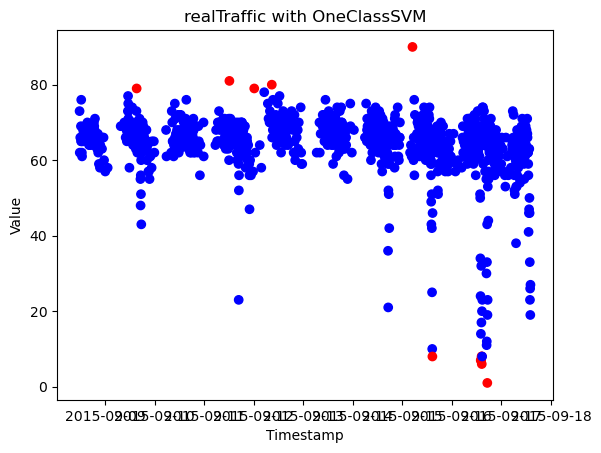

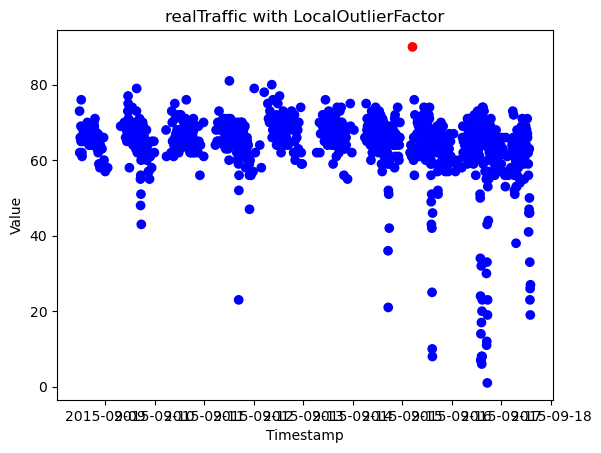

C:\Users\MahmutYAVUZ\AppData\Local\Temp\ipykernel_11068\2992438103.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = df.drop([col], 1)
C:\Users\MahmutYAVUZ\AppData\Local\Temp\ipykernel_11068\2992438103.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = df.drop([col], 1)


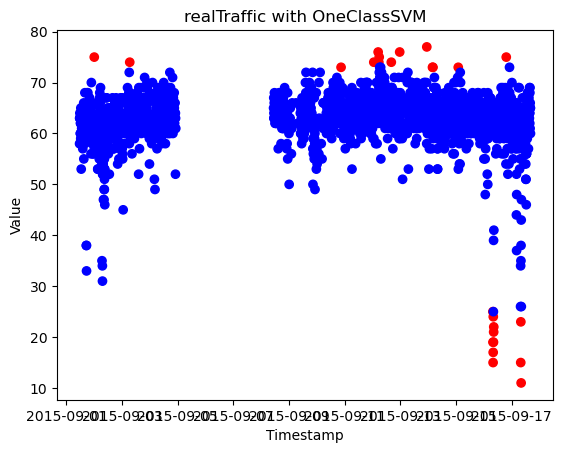

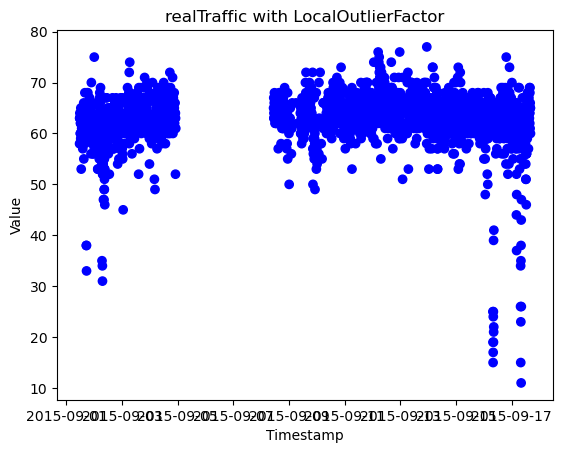

C:\Users\MahmutYAVUZ\AppData\Local\Temp\ipykernel_11068\2992438103.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = df.drop([col], 1)


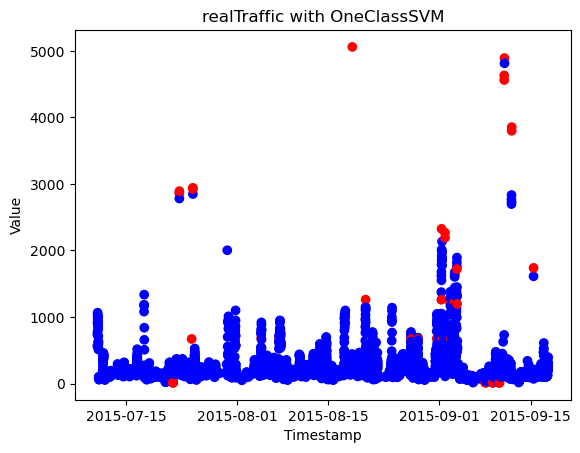

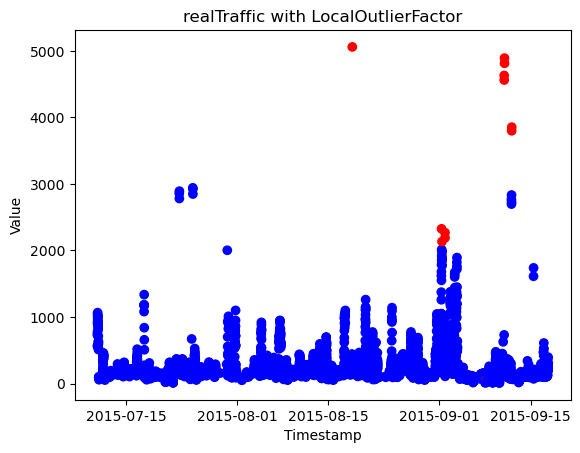

C:\Users\MahmutYAVUZ\AppData\Local\Temp\ipykernel_11068\2992438103.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = df.drop([col], 1)


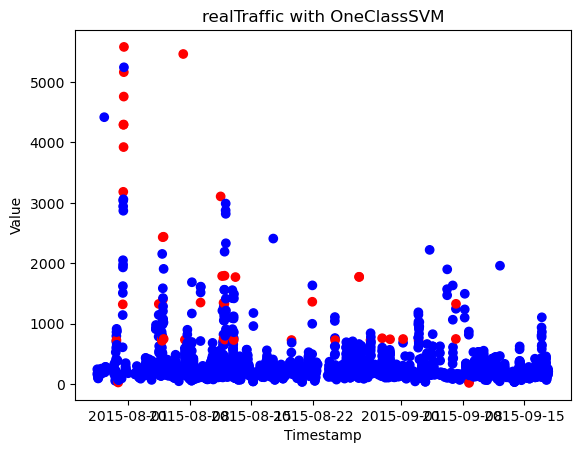

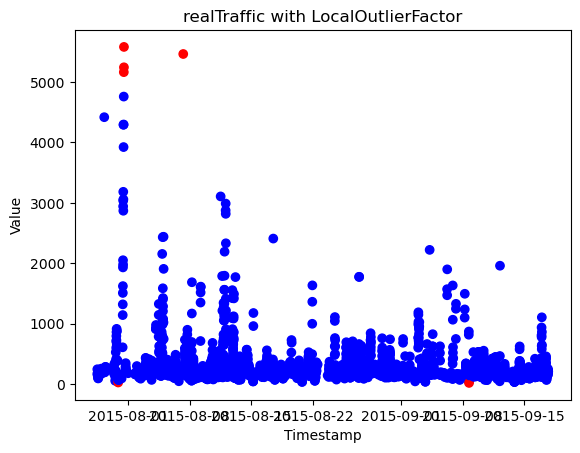

C:\Users\MahmutYAVUZ\AppData\Local\Temp\ipykernel_11068\2992438103.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = df.drop([col], 1)


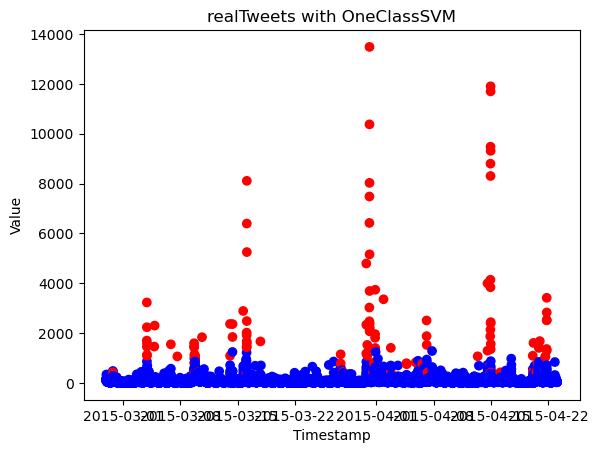

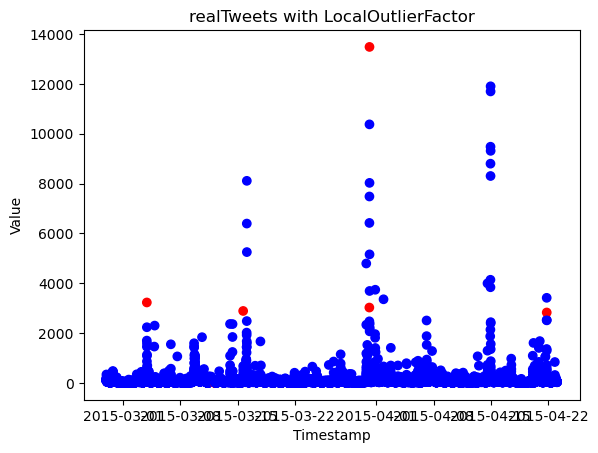

C:\Users\MahmutYAVUZ\AppData\Local\Temp\ipykernel_11068\2992438103.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = df.drop([col], 1)


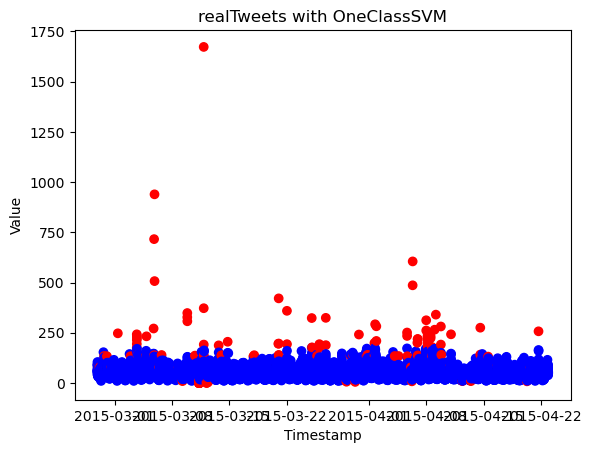

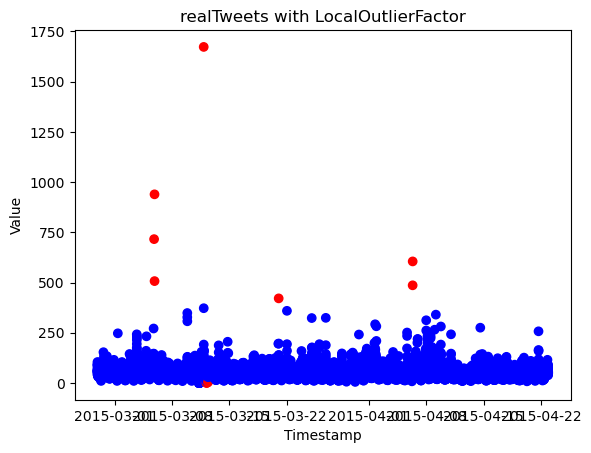

C:\Users\MahmutYAVUZ\AppData\Local\Temp\ipykernel_11068\2992438103.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = df.drop([col], 1)


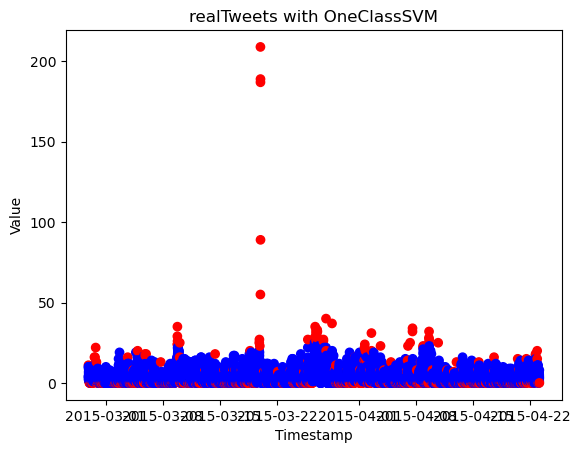

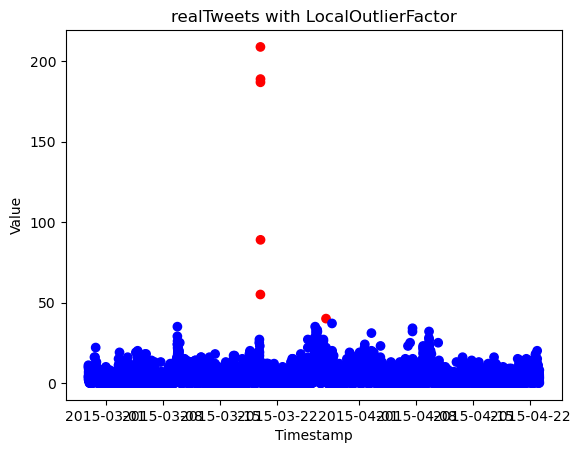

C:\Users\MahmutYAVUZ\AppData\Local\Temp\ipykernel_11068\2992438103.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = df.drop([col], 1)


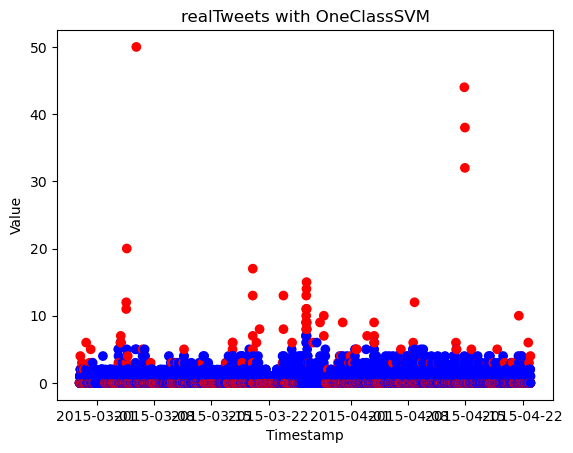

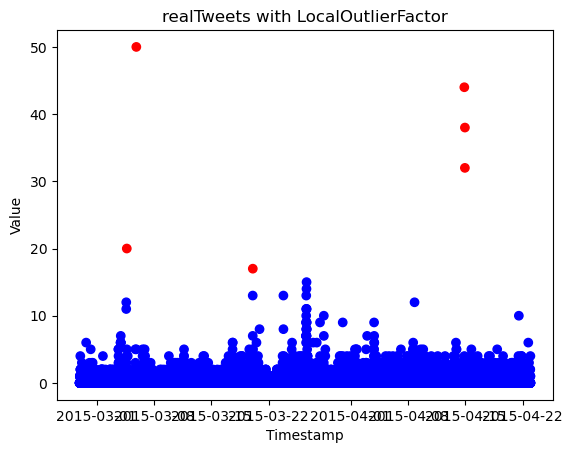

C:\Users\MahmutYAVUZ\AppData\Local\Temp\ipykernel_11068\2992438103.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = df.drop([col], 1)


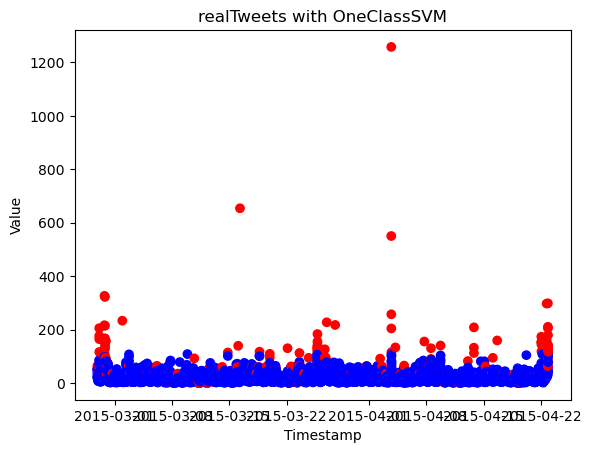

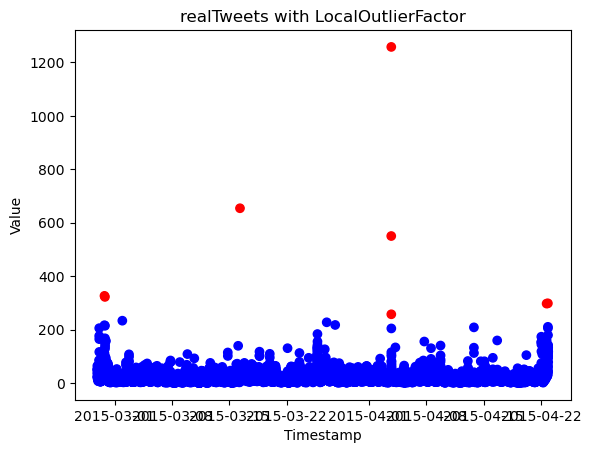

C:\Users\MahmutYAVUZ\AppData\Local\Temp\ipykernel_11068\2992438103.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = df.drop([col], 1)


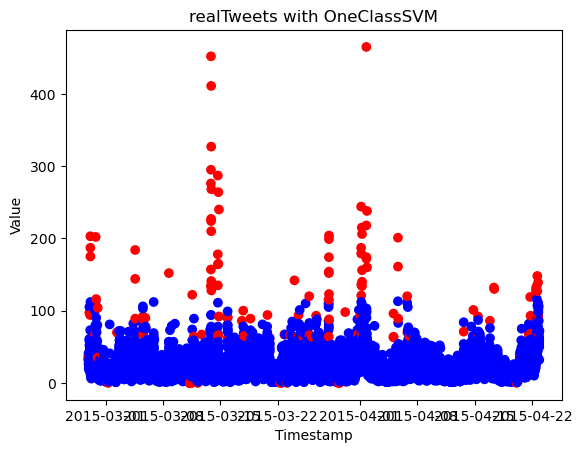

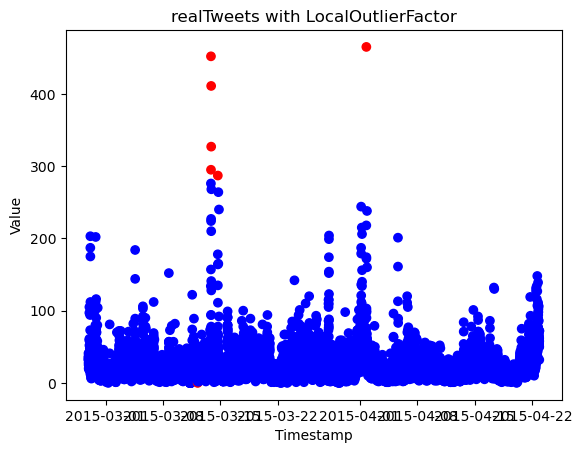

C:\Users\MahmutYAVUZ\AppData\Local\Temp\ipykernel_11068\2992438103.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = df.drop([col], 1)


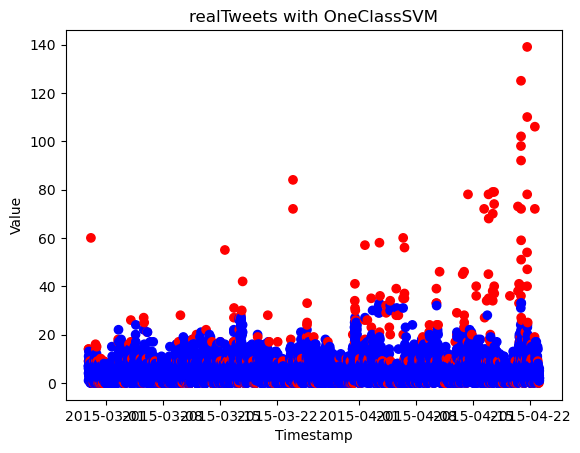

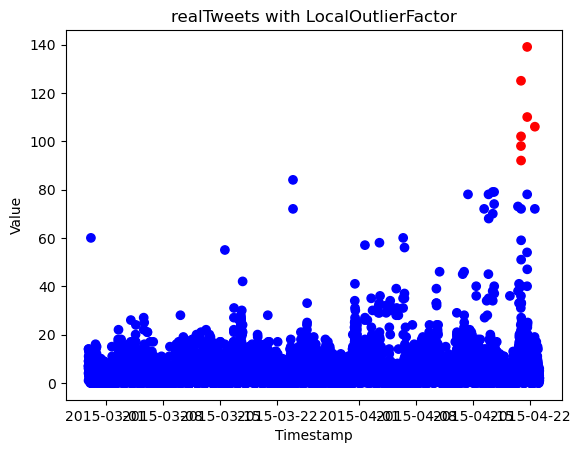

C:\Users\MahmutYAVUZ\AppData\Local\Temp\ipykernel_11068\2992438103.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = df.drop([col], 1)


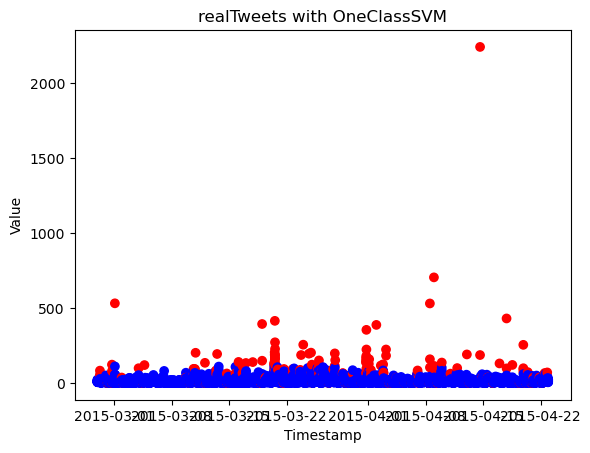

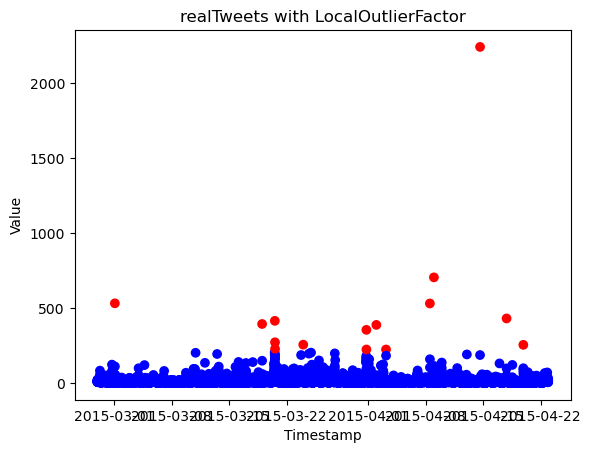

C:\Users\MahmutYAVUZ\AppData\Local\Temp\ipykernel_11068\2992438103.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = df.drop([col], 1)


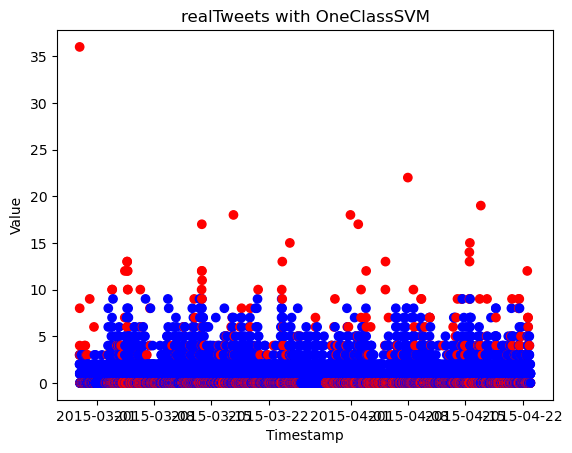

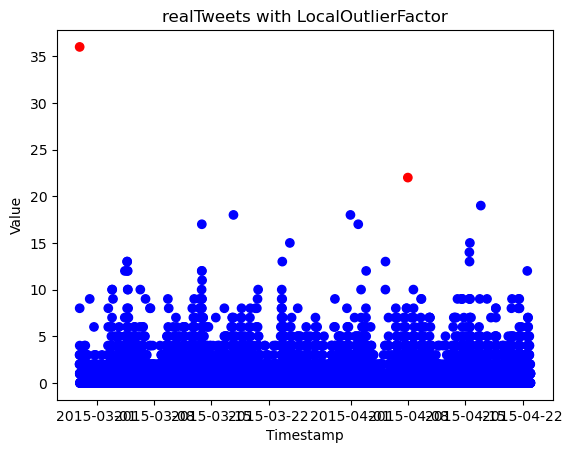

C:\Users\MahmutYAVUZ\AppData\Local\Temp\ipykernel_11068\2992438103.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = df.drop([col], 1)


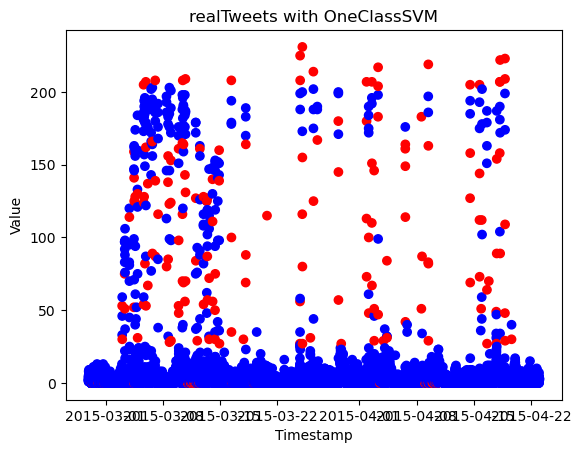

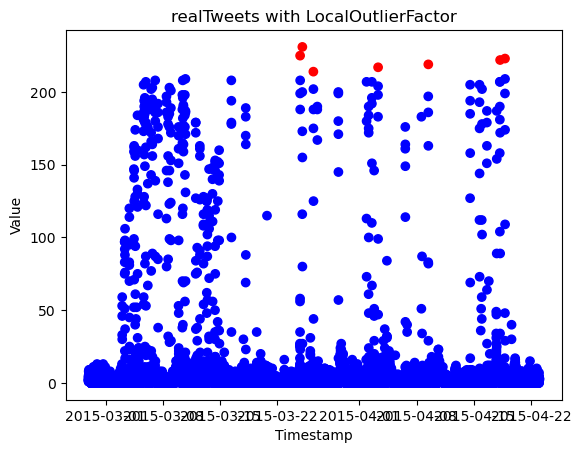

In [10]:
data_list = os.listdir(data_source)
model_list = [OneClassSVM(nu=0.01),LocalOutlierFactor(n_neighbors=10)]
for data_path in data_list:
    title = copy.copy(data_path)
    file_list = os.listdir(data_source+data_path)
    for file in file_list:
        data = read_dataset(data_source+data_path+"/"+file)
        data = feature_engineering(data,'timestamp')
        data = drop_distinct(data)
        cat_cols = data.select_dtypes(include=['object']).columns.tolist()
        for model in model_list:
            pipe = pipeline_build(model,cat_cols)
            output = pd.Series(pipe.fit_predict(data)).apply(lambda x: "anomaly" if x == -1 else "not anomaly")
            df = data.reset_index().copy()
            df['output'] = output
            plot_matplotlib(df,title,model)
            #plot_pxexpress(df,title,model)